### Getting the Dataset
Used: 
- https://nextjournal.com/gkoehler/digit-recognition-with-keras
- Dr.Prasad Perceptron file

In [1]:
# imports for array-handling and plotting


##############
import numpy as np
##############

##############
%matplotlib notebook
#calling it a second time may prevent some graphics errors
%matplotlib notebook
import matplotlib
# Matplotlib relis on some backend to actually reder the plots. DEfaulted backend is agg. Renders PNGs.
matplotlib.use('agg') 
import matplotlib.pyplot as plt
##############

# let's keep our keras backend tensorflow quiet
##############
import os
# Basically we want to control the log message output of our cells.
os.environ['TF_CPP_MIN_LOG_LEVEL']='3' 
#############

##############
# keras imports for the dataset and building our neural network
##############
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation
from keras.utils import np_utils
##############

Using TensorFlow backend.


Now we will load the MNIST Dataset to our training ans test sets.

- X = Images
- Y = Labels

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Check if we imported correctly

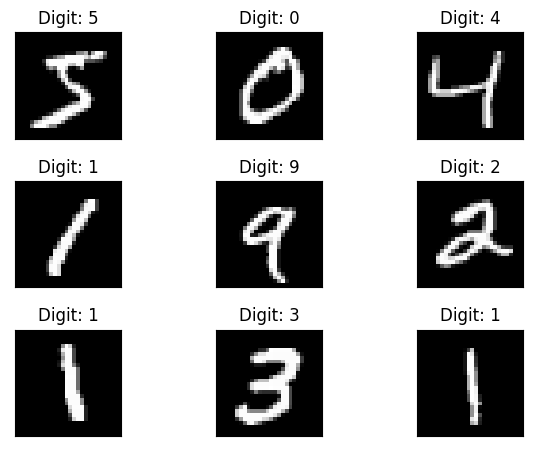

In [3]:
fig = plt.figure()
# Print all 9 images
for i in range(9):
    # To make it 3 x 3 
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    # display image
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    # display label
    plt.title("Digit: {}".format(y_train[i]))
    # spacing
    plt.xticks([])
    plt.yticks([])
fig

Make a vector, Reshape it to 784 = (28*28)

To have a visual understanding of how the pixels ( Colors/squares) works.

Lets look at the distribution of pixels.

As it can be seen:
- A lot of 0 pixels (The black part)
- Pixels 255 are basically the number (White part)

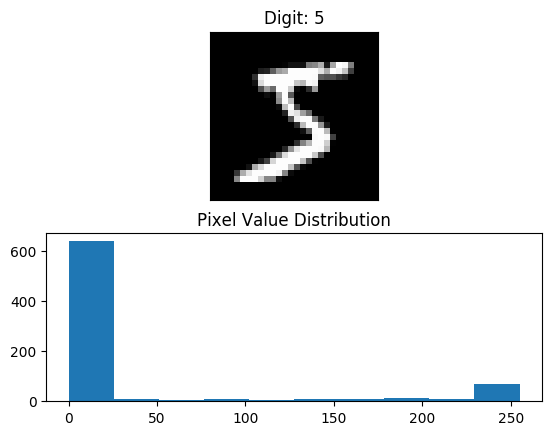

In [4]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
fig

Know lets normalize the data to train our machine. Why?
- Reduce chance of getting stuck with local optima
- we are using SGD (Stochastic gradient descent) to find the optimal weight for the network

How?
- Reshape to a single vector 
- Normalize the pixel values to be 0 or 1

In [5]:
print("Shapes before Reshaping")
# let's print the shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

print("\nShapes after Reshaping")
# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Shapes before Reshaping
X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)

Shapes after Reshaping
Train matrix shape (60000, 784)
Test matrix shape (10000, 784)


In [6]:
#################
# Extra
#################
# See how many labels are in our training set for each number.
print(np.unique(y_train, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [7]:
# one-hot encoding using keras' numpy-related utilities
##################
# Basically, makes 0 if it is not the number, if number then 1 (Same as our where in Old MNIST)
#################

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


### Building the Perceptron

- Our Pixel vector ( when we reshape) is our input.

First Sequential Layer ( Hidden layers)
- Specify our input shape so that Keras can make correct matrices (784)
- We will reduce it to 512-node layers.
- Extra: There is Activation function to enhance the capabilities of the perceptron. (Relu Rectified Linear Unit)
- Extra: Dropout function, prevents overfitting
    - Randomly keep some network weights fixed when we would normally update them so that the network doesn't rely too much on very few nodes.
    
Second Sequential Layer
- Same as First Layer
- Didn't specify shape because it is implicit that is 784

Third Sequential Layer
- Reduce it to our 10 numbers ( 0 -> 9)
- Activation is softmax because is standard for multi-class targets

In [8]:
# building a linear stack of layers with the sequential model
model = Sequential()
model.add(Dense(10, input_shape=(784,)))
model.add(Activation('linear'))                            


### Training Our Machine

After creating our model ( From above).We need to configure the learning process using .compile().

- Loss Function = categorical_crossentropy ( We could use different loss function but used this instead since tutorial uses it)
- Optimizer = adam (Algorithm used for first-order gradient based optimization of functions, based on adaptive estimate of lower-order moments.)
- Metrics = acc ( can be anything again) (Average training accuracy at the end of an epoch)
- val_acc = represents the accuracy of validation set at the end of an epoch.

In [9]:
# compiling the sequential model
from keras.optimizers import SGD

opt = SGD(lr=1)
model.compile(loss='mean_squared_error', metrics=['acc'], optimizer='sgd')

After building our model, train our machine!

- How many do we want to iterate on the whole training set ( epochs = 20)
- How many sample (test) we use for one update to the model's weights ( batch size)
    - The bigger the batch, more stable our SGD.
    - Careful of GPU memory limitation...
- Also, graph learning curve ( Is the AUC basically) 

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 1s - loss: 0.1226 - acc: 0.3871 - val_loss: 0.0866 - val_acc: 0.5840
Epoch 2/20
 - 1s - loss: 0.0788 - acc: 0.6351 - val_loss: 0.0705 - val_acc: 0.6889
Epoch 3/20
 - 1s - loss: 0.0682 - acc: 0.7057 - val_loss: 0.0636 - val_acc: 0.7345
Epoch 4/20
 - 1s - loss: 0.0629 - acc: 0.7385 - val_loss: 0.0596 - val_acc: 0.7596
Epoch 5/20
 - 1s - loss: 0.0595 - acc: 0.7586 - val_loss: 0.0569 - val_acc: 0.7754
Epoch 6/20
 - 1s - loss: 0.0572 - acc: 0.7734 - val_loss: 0.0549 - val_acc: 0.7872
Epoch 7/20
 - 1s - loss: 0.0554 - acc: 0.7829 - val_loss: 0.0534 - val_acc: 0.7953
Epoch 8/20
 - 1s - loss: 0.0540 - acc: 0.7908 - val_loss: 0.0522 - val_acc: 0.8027
Epoch 9/20
 - 1s - loss: 0.0528 - acc: 0.7977 - val_loss: 0.0511 - val_acc: 0.8084
Epoch 10/20
 - 1s - loss: 0.0518 - acc: 0.8027 - val_loss: 0.0503 - val_acc: 0.8110
Epoch 11/20
 - 1s - loss: 0.0510 - acc: 0.8079 - val_loss: 0.0495 - val_acc: 0.8170
Epoch 12/20
 - 1s - loss: 0.0503 - 

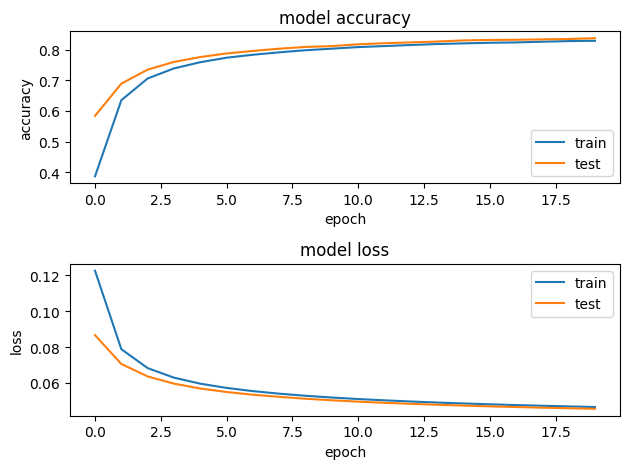

In [10]:
# training the model and saving metrics in history
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = ""
model_name = 'linearRegression.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [11]:
print(os.getcwd())

/home/lala/Desktop/School/EE-496


We can observe that our machine is learning well.

- Compare to last semester, we can observe that is not as accurate as before but is learning.

### Evaluate Model's Performance

Basically model.evalute computes the loss and metric defined when compiling the model.

In [12]:
mnist_model = load_model('linearRegression.h5')
loss_and_metrics = mnist_model.evaluate(X_test, Y_test, verbose=2)

print("Test Loss", loss_and_metrics[0])
print("Test Accuracy", loss_and_metrics[1])

Test Loss 0.04552291731238365
Test Accuracy 0.8367000222206116


Looks good ( accuracy )

Look at all examples


8367  classified correctly
1633  classified incorrectly


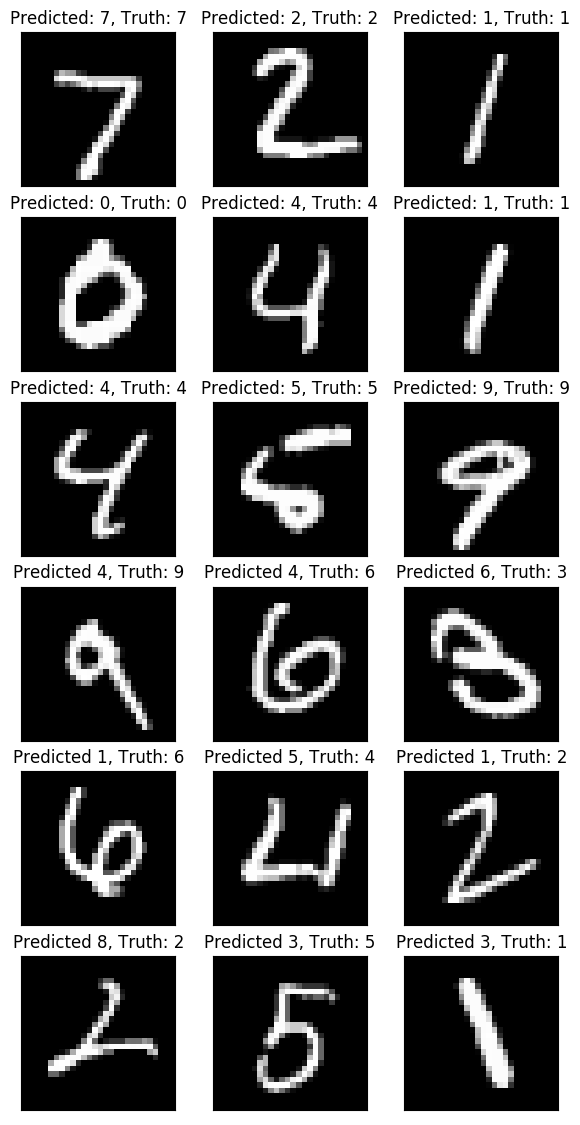

In [13]:
# load the model and create predictions on the test set
mnist_model = load_model('linearRegression.h5')
predicted_classes = mnist_model.predict_classes(X_test)

# see which we predicted correctly and which not
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(6,3,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        y_test[correct]))
    plt.xticks([])
    plt.yticks([])

# plot 9 incorrect predictions
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(6,3,i+10)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted {}, Truth: {}".format(predicted_classes[incorrect], 
                                       y_test[incorrect]))
    plt.xticks([])
    plt.yticks([])

figure_evaluation